# HW_03_Modeling & Hyperparameter Tuning 

## Load Packages 

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)

import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import os
import numpy as np
import pandas as pd
from datetime import datetime

import sys
sys.path.append('./hw2.py')
import hw2

# train, test, valid Split 

In [22]:
train = hw2.read_data("./snf_train.csv")
test = hw2.read_data("./snf_test.csv")
valid = hw2.read_data("./snf_valid.csv")

In [7]:
train.head()

,SNF,lives_alone,asthma,cad,chf,copd,diabetes,diabetes_by_dashbd,htn,obesity,depression,hyplipid,anterior,age,height,weight,prev_snf,prev_surg,dx_1/714,dx_1/715.15,dx_1/715.36,dx_1/715.95,dx_1/715.96,dx_1/719.45,dx_1/719.46,dx_1/733.42,dx_1/m16.10,dx_1/m16.11,dx_1/m16.12,dx_1/m17.11,dx_1/m17.12,dx_1/other,dx_2/715.95,dx_2/715.96,dx_2/719.45,dx_2/719.46,dx_2/m25.551,dx_2/m25.552,dx_2/m25.561,dx_2/m25.562,dx_2/other,ethnicity/hispanic_or_latino,ethnicity/not_hispanic_or_latino,gender/f,gender/m,insurance_1/aetna_medicare,insurance_1/aetna_non-ur,insurance_1/blue_choice,insurance_1/blue_choice_option,insurance_1/blue_shield,insurance_1/cigna,insurance_1/empire_plan,insurance_1/excellus_ur,insurance_1/medicare,insurance_1/medicare_blue_choice,insurance_1/medicare_commercial,insurance_1/mvp_hlthcare,insurance_1/mvp_preferred_gold,insurance_1/out_of_area_blue_shield,insurance_1/united_healthcare_medicare,insurance_1/other,insurance_2/blue_choice,insurance_2/blue_choice_second,insurance_2/blue_shield,insurance_2/blue_shield_second,insurance_2/ccare_five,insurance_2/ccare_four,insurance_2/champus/tricare,insurance_2/commercial_insurance,insurance_2/empire_plan,insurance_2/medicaid,insurance_2/medicare,insurance_2/medicare_a_(only),insurance_2/medicare_blue_choice,insurance_2/medicare_commercial,insurance_2/mvp_hlthcare,insurance_2/mvp_preferred_gold,insurance_2/out_of_area_blue_shield,insurance_2/preferred_care,insurance_2/preferred_care_gold,insurance_2/united_health_care,insurance_2/other,joint/hip,joint/knee,race/black_or_african_american,race/white_or_caucasian,race/other,side/left,side/right,surgeon/A,surgeon/B,surgeon/D,surgeon/E,surgeon/F,surgeon/G,surgeon/H,surgeon/other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,74,67.0,36.80,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,59,77.0,31.52,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,1,1,1,1,0,1,0,70,63.0,36.80,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,64,63.0,30.40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,55,70.0,32.32,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [23]:
X_train, y_train = hw2.split(train, target = "SNF")
X_valid, y_valid = hw2.split(valid, target = "SNF")
X_test, y_test = hw2.split(test, target = "SNF")

## Check class imbalance

Class 0: 826
Class 1: 826
Proportion: 1.0 : 1


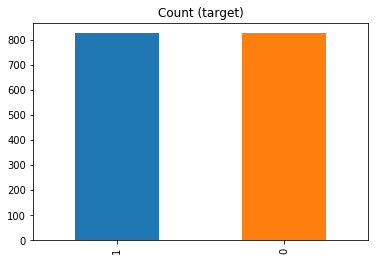

In [9]:
hw2.class_balance(y_train)

# Modeling-Baseline  

In [10]:
hw2.modeling(X_train,y_train,X_valid, y_valid, X_test, y_test)

model:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
validation prediction result: 
validation accuracy result: 88.25301204819277
[[149  13]
 [ 26 144]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       162
           1       0.92      0.85      0.88       170

   micro avg       0.88      0.88      0.88       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.89      0.88      0.88       332

test prediction result: 
test accuracy result: 88.06818181818183
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       181
           1       0.91      0.84      0.87       171

   micro avg       0.88      0.88      0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352

model:  <class 'sklearn.svm.classes.SVC'>
validation prediction result: 
validation accuracy result: 79.8192771084

# Hyperparameter Tuning 

## SVM

In [11]:
def svc_param_selection(X, y, nfolds):
    
    Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ["rbf", "poly","linear"]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
    clf = GridSearchCV(SVC(), param_grid, cv= nfolds)
    clf.fit(X, y)
    print("Best parameters set found on validation set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on validation set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print()

In [12]:
start_time = time.clock()
svc_param_selection(X_valid,y_valid,5)
print(time.clock() - start_time, "seconds")

Best parameters set found on validation set:

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

Grid scores on validation set:

0.512 (+/-0.008) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.690 (+/-0.074) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}
0.690 (+/-0.075) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.512 (+/-0.008) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.837 (+/-0.069) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
0.690 (+/-0.075) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
0.512 (+/-0.008) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.816 (+/-0.096) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}
0.690 (+/-0.075) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}
0.512 (+/-0.008) for {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.816 (+/-0.096) for {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
0.690 (+/-0.075) for {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
0.512 (+/-0.008) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.690 (+/

## Random Forest

In [27]:
def rf_param_selection(X, y, nfolds): 
    # Number of trees 
    n_estimators = [20,30,50,100,150,300]
    # Maximum number of levels in tree
    max_depth = [int(2**x) for x in range(0,5,1)]
    max_features = ['auto', 'sqrt']
    # Minimum number of samples required to split a node
    min_samples_split = [2, 4, 6, 8]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4, 6]
    # split criterion
    criterion = ["gini", "entropy"]
    param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
    clf = GridSearchCV(RandomForestClassifier(), param_grid, cv= nfolds)
    clf.fit(X, y)
    print("Best parameters set found on validation set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on validation set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print()

In [28]:
start_time = time.clock()
rf_param_selection(X_valid,y_valid,5)
print(time.clock() - start_time, "seconds")

Best parameters set found on validation set:

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}

Grid scores on validation set:

0.822 (+/-0.094) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.825 (+/-0.070) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.810 (+/-0.137) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.831 (+/-0.119) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.834 (+/-0.068) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.828 (+/-0.086) for {'criterion': '

0.840 (+/-0.118) for {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30}
0.840 (+/-0.091) for {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
0.834 (+/-0.092) for {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
0.852 (+/-0.082) for {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
0.849 (+/-0.087) for {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
0.831 (+/-0.080) for {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20}
0.846 (+/-0.073) for {'criterion': 'entropy', 'max_depth': 16, 'max_featu

## Neural Network Modeling And Tuning 

In [27]:
train_set.datalist.shape
trainloader.dataset.datalist.shape

(1652, 96)

In [29]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import os
import numpy as np
import pandas as pd
from datetime import datetime
import sys
from sklearn import metrics
# define dataset class for data loader
class mydata(data.Dataset):
    # define how to create an instance, 
    # requires the path to a csv data file (data_file_path)
    # requires the name of the label/output column, as given in the csv
    def __init__(self, data_file_path, label_name):
        df = pd.read_csv(data_file_path)
        labels = df[label_name].values
        data = df.drop(label_name, axis=1)
        self.datalist = data
        self.labels = labels

    def __getitem__(self, index):
        return torch.Tensor(np.asarray(self.datalist.iloc[[index]].astype(float))), self.labels[index]

    def __len__(self):
        return self.datalist.shape[0]

# define network class
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(96, 100)
        self.hidden2 = nn.Linear(100, 10)

        # Output layer, 2 nodes = one for each class
        # if we were using a sigmoid activation for our output layer, we would have only one node. softmax requires one per class which is why here we use two.
        self.output = nn.Linear(10, 2)

        # Define sigmoid activation and softmax output 
        self.sigmoid1 = nn.Sigmoid()
        self.sigmoid2 = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.sigmoid1(x)

        x = self.hidden2(x)
        x = self.sigmoid2(x)

        x = self.output(x)
        x = self.softmax(x)
        return x

In [30]:
# set hyperparameters
# you should record all your hyperparameters in readable (and usable) format in one block to make it easy to reference
# this includes arcitechture features like dropout rate, if batchnorm is present, etc.
    # set our loss funciton to negative log likelihood
    # there are many availalbe loss functions in pytorch
    # you can also define your own loss function, although autograd may not work with a custom function
loss_func = nn.NLLLoss()
loss_func_name = 'neg log like'
confidence_threshold = 0.5
loss_adj_conf_thresh = np.log(confidence_threshold)
optimizer_name = 'SGD'

# learn_rates = [0.001,0.005,0.01,0.5] 
# num_epochs = [50,100,150,200]
# batch_sizes = [1,16,32,64]

learn_rate = 0.001
num_epoch = 64
batch_size = 64

# for learn_rate in learn_rates:
#     for num_epoch in num_epochs:
#         for batch_size in batch_sizes:

start_time = datetime.now()

# you should  create a unique ID for this hyperparameter run, this should be a folder you save all relevent files to (hyperparams file, training logs, model weights, etc.)
#             run_id = 'nn_SGD_lr{}_ep{}_b{}'.format(learn_rate, num_epoch, batch_size)
run_id = ''
os.mkdir(run_id)

# record all hyperparameters that might be useful to reference later
# once you get to a couple dozen hyperparameter runs you will be very thankful for this
with open(run_id + '/hyperparams.csv', 'w') as wfil:
    wfil.write("loss function," + loss_func_name + '\n')
    wfil.write("learning rate," + str(learn_rate) + '\n')
    wfil.write("number epochs," + str(num_epoch) + '\n')
    wfil.write("batch size," + str(batch_size) + '\n')
    wfil.write("optimizer," + str(learn_rate) + '\n')
    wfil.write("start time," + str(start_time) + '\n')

# create loaders to feed in data to the network in batches
path = "./"
train_set = mydata(path + "./snf_train.csv", 'SNF')
trainloader = torch.utils.data.DataLoader( dataset = train_set , batch_size= batch_size , shuffle = True)
valid_set = mydata(path + "./snf_valid.csv", 'SNF')
validloader = torch.utils.data.DataLoader( dataset = valid_set , batch_size= batch_size , shuffle = True)

# initialize network
model = Network()

# initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=learn_rate)

# track best val loss to know when to save best weights
best_valid_loss = "unset"

In [31]:
with open(run_id + '/log_file.csv', 'w') as log_fil:
    # write headers for log file
    log_fil.write("epoch,epoch duration,train loss,valid loss,train accuracy, valid accuracy, train recall, valid recall, train precision, valid precision\n")
    
    for epoch in range(0, num_epoch):
        epoch_start = datetime.now()

        # track train and validation loss
        epoch_train_loss = 0.0
        epoch_valid_loss = 0.0

        # track train and validation accuracy
        epoch_train_accuracy = 0.0
        epoch_valid_accuracy = 0.0
        epoch_train_counter = 0.0
        epoch_valid_counter = 0.0
        
        pred_train_outputs = torch.Tensor()
        train_label = np.array([])
        pred_val_outputs = torch.Tensor()
        valid_label = np.array([])
        for i, (images, labels) in enumerate(trainloader):

            # zero out gradients for every batch or they will accumulate
            optimizer.zero_grad()

            # forward step
            outputs = model(images)

            # compute loss
            loss = loss_func(outputs, labels)

            # backwards step
            loss.backward()

            # update weights and biases
            optimizer.step()

            # track training loss
            epoch_train_loss += loss.item()

            pred_train_outputs = torch.cat([pred_train_outputs, outputs], dim = 0)
            train_label = np.concatenate([train_label, labels.numpy()])

		# get predicted valid dataset results and recall of valid dataset
        pred_train_label = (pred_train_outputs.detach().numpy()[:, 1] > loss_adj_conf_thresh).astype("int")

        pred_train_recall = metrics.recall_score(train_label, pred_train_label)
        epoch_train_accuracy = metrics.accuracy_score(train_label, pred_train_label)
        pred_train_precision = metrics.precision_score(train_label, pred_train_label)

        # track valid loss - the torch.no_grad() unsures gradients will not be updated based on validation set
        with torch.no_grad():
            for i, (images, labels) in enumerate(validloader):
                outputs = model(images)
                loss = loss_func(outputs, labels)
                epoch_valid_loss += loss.item()

                pred_val_outputs = torch.cat([pred_val_outputs, outputs], dim=0)
                valid_label = np.concatenate([valid_label, labels.numpy()])

        # get predicted valid dataset results and recall of valid dataset
        pred_valid_label = (pred_val_outputs.numpy()[:, 1] > loss_adj_conf_thresh).astype("int")
        
        pred_valid_recall = metrics.recall_score(valid_label, pred_valid_label)
        pred_valid_precision = metrics.precision_score(valid_label, pred_valid_label)
        epoch_valid_accuracy = metrics.accuracy_score(valid_label, pred_valid_label)
        

        # track total epoch time
        epoch_end = datetime.now()
        epoch_time = (epoch_end - epoch_start).total_seconds()

        # save best weights
        if best_valid_loss=="unset" or epoch_valid_loss < best_valid_loss:
            best_valid_loss = epoch_valid_loss
            torch.save(model, run_id + "/best_weights.pth")

        # save most recent weights
        torch.save(model, run_id + "/last_weights.pth")

        # save epoch results in log file
        log_fil.write( str(epoch) + ',' + str(epoch_time) + ',' + str(epoch_train_loss) + ',' \
                      + str(epoch_valid_loss) + ',' + str(epoch_train_accuracy) + ',' \
                      + str(epoch_valid_accuracy) +','+ str(pred_train_recall) +','\
                      + str(pred_valid_recall) + ','\
                      + str(pred_train_precision) +',' +  str(pred_valid_precision)+'\n' )

        # print out epoch level training details
#         print("epoch: " + str(epoch) + " - ("+ str(epoch_time) + " seconds)" + "\n\ttrain loss: " + str(epoch_train_loss) + " - train accuracy: " + str(epoch_train_accuracy) + "\n\tvalid loss: " + str(epoch_valid_loss) + " - valid accuracy: " + str(epoch_valid_accuracy))
        print("epoch: " + str(epoch) + " - ("+ str(epoch_time) + " seconds)" \
              + "\n\ttrain loss: " + str(epoch_train_loss) + " - train accuracy: " \
              + str(epoch_train_accuracy) + " - train recall: "+ str(pred_train_recall)+\
                " - train precision: " + str(pred_train_precision) +
              "\n\tvalid loss: " + str(epoch_valid_loss) \
              + " - valid accuracy: " + str(epoch_valid_accuracy)  + " - valid recall: " + str(pred_valid_recall)+\
              " - valid precision: "+ str(pred_valid_precision)
              )
end_time = datetime.now()
with open(run_id + '/hyperparams.csv', 'a') as wfil:
    wfil.write("end time," + str(end_time) + '\n')

# Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

epoch: 0 - (3.521566 seconds)
	train loss: 1268.3559919595718 - train accuracy: 0.5072639225181598 - train recall: 0.5024213075060533 - train precision: 0.5073349633251834
	valid loss: 234.23820436000824 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 1 - (3.198117 seconds)
	train loss: 1250.6715467870235 - train accuracy: 0.5278450363196125 - train recall: 0.5230024213075061 - train precision: 0.5281173594132029
	valid loss: 228.93786025047302 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 2 - (2.725281 seconds)
	train loss: 1257.46882969141 - train accuracy: 0.5260290556900726 - train recall: 0.5242130750605327 - train precision: 0.5261239368165249
	valid loss: 229.65978026390076 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 3 - (2.747813 seconds)
	train loss: 1275.925827652216 - train accuracy: 0.49031476997578693 - train recall: 0.4891041162227603 -

epoch: 28 - (2.74166 seconds)
	train loss: 1261.8880190253258 - train accuracy: 0.5048426150121066 - train recall: 0.4963680387409201 - train precision: 0.5049261083743842
	valid loss: 327.53237622976303 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 29 - (2.578838 seconds)
	train loss: 1254.0120833814144 - train accuracy: 0.524818401937046 - train recall: 0.5242130750605327 - train precision: 0.5248484848484849
	valid loss: 261.4622641503811 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 30 - (2.521706 seconds)
	train loss: 1269.688648790121 - train accuracy: 0.5012106537530266 - train recall: 0.4963680387409201 - train precision: 0.5012224938875306
	valid loss: 230.08588778972626 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 31 - (2.515718 seconds)
	train loss: 1264.1990391910076 - train accuracy: 0.5060532687651331 - train recall: 0.5

epoch: 57 - (2.936531 seconds)
	train loss: 1255.4246889352798 - train accuracy: 0.5169491525423728 - train recall: 0.5278450363196125 - train precision: 0.5165876777251185
	valid loss: 368.6601663827896 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 58 - (3.442348 seconds)
	train loss: 1273.934023141861 - train accuracy: 0.5060532687651331 - train recall: 0.49878934624697335 - train precision: 0.5061425061425061
	valid loss: 230.04685086011887 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 59 - (2.911197 seconds)
	train loss: 1267.4325597286224 - train accuracy: 0.5012106537530266 - train recall: 0.5157384987893463 - train precision: 0.5011764705882353
	valid loss: 231.70901650190353 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 60 - (2.933778 seconds)
	train loss: 1251.4501864910126 - train accuracy: 0.5236077481840193 - train recall: 

epoch: 86 - (3.031963 seconds)
	train loss: 1281.2750652432442 - train accuracy: 0.4891041162227603 - train recall: 0.4915254237288136 - train precision: 0.4891566265060241
	valid loss: 270.9300693869591 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 87 - (3.328239 seconds)
	train loss: 1261.1635609567165 - train accuracy: 0.5078692493946732 - train recall: 0.5121065375302664 - train precision: 0.5078031212484994
	valid loss: 230.02762365341187 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 88 - (2.818036 seconds)
	train loss: 1268.2776655256748 - train accuracy: 0.5121065375302664 - train recall: 0.5012106537530266 - train precision: 0.5123762376237624
	valid loss: 235.7312992811203 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 89 - (3.159817 seconds)
	train loss: 1270.347964555025 - train accuracy: 0.5060532687651331 - train recall: 0.

epoch: 115 - (3.336998 seconds)
	train loss: 1264.881742745638 - train accuracy: 0.4963680387409201 - train recall: 0.5084745762711864 - train precision: 0.49645390070921985
	valid loss: 230.61040371656418 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 116 - (2.869588 seconds)
	train loss: 1265.5204918980598 - train accuracy: 0.5072639225181598 - train recall: 0.5157384987893463 - train precision: 0.5071428571428571
	valid loss: 262.64360001683235 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 117 - (2.980979 seconds)
	train loss: 1270.7256027758121 - train accuracy: 0.4963680387409201 - train recall: 0.49515738498789347 - train precision: 0.4963592233009709
	valid loss: 239.6881789267063 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 118 - (2.936097 seconds)
	train loss: 1254.8442549705505 - train accuracy: 0.5169491525423

epoch: 143 - (3.513661 seconds)
	train loss: 1246.2478729784489 - train accuracy: 0.5242130750605327 - train recall: 0.5157384987893463 - train precision: 0.5246305418719212
	valid loss: 236.92347794771194 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 144 - (3.107331 seconds)
	train loss: 1268.28787997365 - train accuracy: 0.5084745762711864 - train recall: 0.5048426150121066 - train precision: 0.5085365853658537
	valid loss: 244.42564588785172 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 145 - (2.820887 seconds)
	train loss: 1277.3232462406158 - train accuracy: 0.4963680387409201 - train recall: 0.4854721549636804 - train precision: 0.4962871287128713
	valid loss: 276.72537910938263 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 146 - (2.764661 seconds)
	train loss: 1273.5686621665955 - train accuracy: 0.49878934624697335 - train recall: 0.492736077

epoch: 172 - (2.612362 seconds)
	train loss: 1265.4340528845787 - train accuracy: 0.5066585956416465 - train recall: 0.4927360774818402 - train precision: 0.5068493150684932
	valid loss: 242.57063522934914 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 173 - (2.709936 seconds)
	train loss: 1258.7410130500793 - train accuracy: 0.4957627118644068 - train recall: 0.48426150121065376 - train precision: 0.49566294919454773
	valid loss: 239.79615783691406 - valid accuracy: 0.5120481927710844 - valid recall: 1.0 - valid precision: 0.5120481927710844
epoch: 174 - (2.594124 seconds)
	train loss: 1279.2139648795128 - train accuracy: 0.48365617433414043 - train recall: 0.48184019370460046 - train precision: 0.4835965978128797
	valid loss: 233.59682738780975 - valid accuracy: 0.4879518072289157 - valid recall: 0.0 - valid precision: 0.0
epoch: 175 - (2.668133 seconds)
	train loss: 1269.4763941168785 - train accuracy: 0.49515738498789347 - train recall: 0.487

## Overfitting Model 

In [46]:
# %load ../Homework_3_files/NN/train_nn_ex_overfit.py

import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import os
import numpy as np
import pandas as pd
from datetime import datetime
import sys

# This implementation does not use cuda or gpu acceleration

# define dataset class for data loader
class mydata(data.Dataset):
	# define how to create an instance, 
	# requires the path to a csv data file (data_file_path)
	# requires the name of the label/output column, as given in the csv
	def __init__(self, data_file_path, label_name):
		df = pd.read_csv(data_file_path)
		labels = df[label_name].values
		data = df.drop(label_name, axis=1)
		self.datalist = data
		self.labels = labels

	def __getitem__(self, index):
		return torch.Tensor(np.asarray(self.datalist.iloc[[index]].astype(float))), self.labels[index]

	def __len__(self):
		return self.datalist.shape[0]

# define network class
class Network(nn.Module):
	def __init__(self, dropout_rate = 0.0):
		super().__init__()
		# Inputs to hidden layer linear transformation
		self.hidden1 = nn.Linear(96, 50)
		self.hidden2 = nn.Linear(50, 10)

		# Output layer, 2 nodes = one for each class
		# if we were using a sigmoid activation for our output layer, we would have only one node. softmax requires one per class which is why here we use two.
		self.output = nn.Linear(10, 2)

		# Define sigmoid activation and softmax output 
		self.sigmoid1 = nn.Sigmoid()
		self.sigmoid2 = nn.Sigmoid()
		self.softmax = nn.LogSoftmax(dim=1)

		# define dropout layers
		self.dropout1 = nn.Dropout(p=dropout_rate)
		self.dropout2 = nn.Dropout(p=dropout_rate)

		# define batch norm layers
		self.batchnorm1 = nn.BatchNorm1d(50)
		self.batchnorm2 = nn.BatchNorm1d(10)
		

	def forward(self, x):
		x = x.view(x.shape[0], -1)
		# Pass the input tensor through each of our operations
		
		x = self.hidden1(x)
		x = self.sigmoid1(x)
		x = self.dropout1(x)
		x = self.batchnorm1(x)

		x = self.hidden2(x)
		x = self.sigmoid2(x)
		x = self.dropout2(x)
		x = self.batchnorm2(x)

		x = self.output(x)
		x = self.softmax(x)
		
		return x


# set hyperparameters
# you should record all your hyperparameters in readable (and usable) format in one block to make it easy to reference
# this includes arcitechture features like dropout rate, if batchnorm is present, etc.
	# set our loss funciton to negative log likelihood
	# there are many availalbe loss functions in pytorch
	# you can also define your own loss function, although autograd may not work with a custom function
loss_func = nn.NLLLoss()
loss_func_name = 'negative log likelihood'
learn_rate = .001
num_epochs = 64
batch_size = 64
confidence_threshold = 0.5
loss_adj_conf_thresh = np.log(confidence_threshold)
optimizer_name = 'Adam'
start_time = datetime.now()
# momentum = 0.0

# overfitting correction hyperparameters
# early_stopping_thresh = -50
# early_stopping_num_epochs = 5
dropout_rate = 0.0
l2_lambda = 0.05
# if you want to add learning rate scheduler, use *torch.optim.lr_scheduler* https://pytorch.org/docs/stable/optim.html


# you should  create a unique ID for this hyperparameter run, this should be a folder you save all relevent files to (hyperparams file, training logs, model weights, etc.)
run_id = "nn_overfit_Adam_lr0.001_ep64_b64_L2_0.01"
os.mkdir(run_id)

# record all hyperparameters that might be useful to reference later
# once you get to a couple dozen hyperparameter runs you will be very thankful for this
with open(run_id + '/hyperparams.csv', 'w') as wfil:
	wfil.write("loss function," + loss_func_name + '\n')
	wfil.write("learning rate," + str(learn_rate) + '\n')
	wfil.write("number epochs," + str(num_epochs) + '\n')
	wfil.write("batch size," + str(batch_size) + '\n')
	wfil.write("optimizer," + str(learn_rate) + '\n')
# 	wfil.write("momentum," + str(momentum) + '\n')
# 	wfil.write("early stopping threshold," + str(early_stopping_thresh) + '\n')
# 	wfil.write("early stopping number of epochs necessary," + str(early_stopping_num_epochs) + '\n')
# 	wfil.write("dropout rate," + str(dropout_rate) + '\n')
	wfil.write("regularization weight," + str(l2_lambda) + '\n')
	wfil.write("using batch norm," + "yes" + '\n')
	wfil.write("start time," + str(start_time) + '\n')


# weights are initialized randomly by default
# pytorch  has some built in initialization options which can be found
# additionally, if you want to write your own initialization scheme you can follow the examples in the second answer on this stackoverflow post https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch 

# initialize network
model = Network(dropout_rate = dropout_rate)

# create loaders to feed in data to the network in batches
train_set = mydata("./snf_train.csv", 'SNF')
trainloader = torch.utils.data.DataLoader( dataset = train_set , batch_size= batch_size , shuffle = True)
valid_set = mydata("./snf_valid.csv", 'SNF')
validloader = torch.utils.data.DataLoader( dataset = valid_set , batch_size= batch_size , shuffle = True)

# initialize optimizer
# adding in the weight decay parameter to the optimizer turns l2 regularization on. The value this parameter takes is equal to it's lambda - larger lambda means more regularization
# adding the momentum term adds momentum to the model with the value provided
optimizer = optim.Adam(model.parameters(), lr=learn_rate, weight_decay=l2_lambda)


# track best val loss to know when to save best weights
best_valid_loss = "unset"

# track stuff for early stopping
early_stopping_counter = 0
es_valid_loss = 0.0

with open(run_id + '/log_file.csv', 'w') as log_fil:
	# write headers for log file
	log_fil.write("epoch,epoch duration,train loss,valid loss,train accuracy, valid accuracy\n")

	for epoch in range(0, num_epochs):
		epoch_start = datetime.now()

		# track train and validation loss
		epoch_train_loss = 0.0
		epoch_valid_loss = 0.0

		# track train and validation accuracy
		epoch_train_accuracy = 0.0
		epoch_valid_accuracy = 0.0
		epoch_train_counter = 0.0
		epoch_valid_counter = 0.0

		for i, (images, labels) in enumerate(trainloader):

			# zero out gradients for every batch or they will accumulate
			optimizer.zero_grad()

			# undoes model.eval()
			model.train(True)

			# forward step
			outputs = model(images)

			# compute loss
			loss = loss_func(outputs, labels)

			# backwards step
			loss.backward()

			# update weights and biases
			# rembmer if using scheduler, you step the scheduler not the optimizer - see *torch.optim.lr_scheduler* https://pytorch.org/docs/stable/optim.html
			optimizer.step()

			# track training loss
			epoch_train_loss += loss.item()

			# calculate training accuracy
			for i in range(0,len(labels)):
				temp_label = labels[i]
				temp_pred = outputs[i,1]
				if temp_pred > loss_adj_conf_thresh:
					temp_pred = 1.0
				else:
					temp_pred = 0.0
				if float(temp_pred) - float(temp_label) == 0:
					epoch_train_accuracy += 1.0
				epoch_train_counter += 1.0

		epoch_train_accuracy = epoch_train_accuracy / epoch_train_counter

		# track valid loss - the torch.no_grad() unsures gradients will not be updated based on validation set
		with torch.no_grad():
			for i, (images, labels) in enumerate(validloader):
				# Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.
				model.eval()

				outputs = model(images)
				loss = loss_func(outputs, labels)
				epoch_valid_loss += loss.item()

				# calculate validation accuracy
				for i in range(0,len(labels)):
					temp_label = labels[i]
					temp_pred = outputs[i,1]
					if temp_pred > loss_adj_conf_thresh:
						temp_pred = 1.0
					else:
						temp_pred = 0.0
					if float(temp_pred) - float(temp_label) == 0:
						epoch_valid_accuracy += 1.0
					epoch_valid_counter += 1.0

		epoch_valid_accuracy = epoch_valid_accuracy / epoch_valid_counter

		# track total epoch time
		epoch_end = datetime.now()
		epoch_time = (epoch_end - epoch_start).total_seconds()

		# save best weights
		if best_valid_loss=="unset" or epoch_valid_loss < best_valid_loss:
			best_valid_loss = epoch_valid_loss
			torch.save(model, run_id + "/best_weights.pth")

		# save most recent weights
		torch.save(model, run_id + "/last_weights.pth")

		# save epoch results in log file
		log_fil.write( str(epoch) + ',' + str(epoch_time) + ',' + str(epoch_train_loss) + ',' + str(epoch_valid_loss) + ',' + str(epoch_train_accuracy) + ',' + str(epoch_valid_accuracy) + '\n' )
		
		# print out epoch level training details
		print("epoch: " + str(epoch) + " - ("+ str(epoch_time) + " seconds)" + "\n\ttrain loss: " + str(epoch_train_loss) + " - train accuracy: " + str(epoch_train_accuracy) + "\n\tvalid loss: " + str(epoch_valid_loss) + " - valid accuracy: " + str(epoch_valid_accuracy))

# 		# implement early stopping
# 		if es_valid_loss == 0.0:
# 			early_stopping_counter = 0
# 			es_valid_loss = epoch_valid_loss

# 		if es_valid_loss - epoch_valid_loss < early_stopping_thresh:
# 			early_stopping_counter += 1
# 		else:
# 			early_stopping_counter = 0
# 			es_valid_loss = epoch_valid_loss

# 		if early_stopping_counter >= early_stopping_num_epochs:
# 			print("Stopped Early")
# 			break

end_time = datetime.now()
with open(run_id + '/hyperparams.csv', 'a') as wfil:
	wfil.write("end time," + str(end_time) + '\n')

# Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

epoch: 0 - (1.900371 seconds)
	train loss: 16.85621827840805 - train accuracy: 0.6271186440677966
	valid loss: 4.036421537399292 - valid accuracy: 0.5120481927710844
epoch: 1 - (2.007539 seconds)
	train loss: 13.578778475522995 - train accuracy: 0.7693704600484261
	valid loss: 3.3806356489658356 - valid accuracy: 0.7289156626506024
epoch: 2 - (2.693302 seconds)
	train loss: 11.733024597167969 - train accuracy: 0.8232445520581114
	valid loss: 2.773935556411743 - valid accuracy: 0.8313253012048193
epoch: 3 - (2.146416 seconds)
	train loss: 10.304826259613037 - train accuracy: 0.8631961259079903
	valid loss: 2.383752226829529 - valid accuracy: 0.8313253012048193
epoch: 4 - (2.224369 seconds)
	train loss: 9.41749021410942 - train accuracy: 0.8674334140435835
	valid loss: 2.404764711856842 - valid accuracy: 0.8283132530120482
epoch: 5 - (2.527947 seconds)
	train loss: 8.809079349040985 - train accuracy: 0.8722760290556901
	valid loss: 2.8129039108753204 - valid accuracy: 0.7108433734939759


epoch: 50 - (2.53691 seconds)
	train loss: 7.328860357403755 - train accuracy: 0.8880145278450363
	valid loss: 3.4316114485263824 - valid accuracy: 0.6897590361445783
epoch: 51 - (1.937927 seconds)
	train loss: 7.36510705947876 - train accuracy: 0.887409200968523
	valid loss: 1.726383462548256 - valid accuracy: 0.8644578313253012
epoch: 52 - (1.886398 seconds)
	train loss: 7.416424781084061 - train accuracy: 0.8807506053268765
	valid loss: 2.055463135242462 - valid accuracy: 0.8373493975903614
epoch: 53 - (1.974823 seconds)
	train loss: 7.353884726762772 - train accuracy: 0.887409200968523
	valid loss: 2.0753112733364105 - valid accuracy: 0.8463855421686747
epoch: 54 - (1.956347 seconds)
	train loss: 7.2549599558115005 - train accuracy: 0.8922518159806295
	valid loss: 1.8576801866292953 - valid accuracy: 0.8614457831325302
epoch: 55 - (1.928354 seconds)
	train loss: 7.255709156394005 - train accuracy: 0.8868038740920097
	valid loss: 3.2270909249782562 - valid accuracy: 0.75602409638554

## Model Prediction 

In [68]:
# %load ../Homework_3_files/NN/predict_nn_ex.py

import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import os
import numpy as np
import pandas as pd
from datetime import datetime
import sys
import random



# define network class
class Network(nn.Module):
	def __init__(self):
		super().__init__()
		# Inputs to hidden layer linear transformation
		self.hidden1 = nn.Linear(96, 50)
		self.hidden2 = nn.Linear(50, 10)

		# Output layer, 2 nodes = one for each class
		# if we were using a sigmoid activation for our output layer, we would have only one node. softmax requires one per class which is why here we use two.
		self.output = nn.Linear(10, 2)

		# Define sigmoid activation and softmax output 
		self.sigmoid1 = nn.Sigmoid()
		self.sigmoid2 = nn.Sigmoid()
		self.softmax = nn.LogSoftmax(dim=1)

	def forward(self, x):
		x = x.view(x.shape[0], -1) # view = reshape

		# Pass the input tensor through each of our operations
		x = self.hidden1(x)
		x = self.sigmoid1(x)

		x = self.hidden2(x)
		x = self.sigmoid2(x)

		x = self.output(x)
		x = self.softmax(x)
		return x

# define dataset class for data loader
class mydata(data.Dataset):
	# define how to create an instance, 
	# requires the path to a csv data file (data_file_path)
	# requires the name of the label/output column, as given in the csv
    # pytorch init ---dataset +  dataloader
	def __init__(self, data_file_path, label_name):
		df = pd.read_csv(data_file_path)
		labels = df[label_name].values
		data = df.drop(label_name, axis=1)
		self.datalist = data
		self.labels = labels

	def __getitem__(self, index):
		return torch.Tensor(np.asarray(self.datalist.iloc[[index]].astype(float))), self.labels[index]

	def __len__(self):
		return self.datalist.shape[0]

# identify where the weights you want to load are 
# weight_fil = sys.argv[2] #"../nn_Adam_b64_ep64_lr0.01/best_weights.pth"

weight_fil = "./nn_Adam_b64_ep_64_lr0.001/best_weights.pth"
# identify where the data you want to test on is using a command line argument
# can also hard code this

# data_fil = sys.argv[1]
data_fil = "./snf_test.csv"
# print(data_fil)
# set necessary hyperparameters
batch_size = 64
loss_func = nn.NLLLoss()
confidence_threshold = 0.5
loss_adj_conf_thresh = np.log(confidence_threshold)
random.seed(10)
# # initialize model
# model = Network()

# # load weights
# model.load_state_dict(torch.load(weight_fil))

model = torch.load(weight_fil)

# put model in evaluation mode (sets dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results)
model.eval()

# create loaders to feed in data to the network in batches
eval_set = mydata(data_fil, 'SNF')
eval_loader = torch.utils.data.DataLoader( dataset = eval_set , batch_size= batch_size , shuffle = True)

# track metrics over dataset
eval_loss = 0.0
eval_accuracy = 0.0
eval_counter = 0.0
pred_eval_outputs = torch.Tensor()
eval_label = np.array([])

# loop through eval data
for i, (images, labels) in enumerate(eval_loader):

    # run the model on the eval batch
    outputs = model(images)

    # compute eval loss
    loss = loss_func(outputs, labels)
    eval_loss += loss.item()

    pred_eval_outputs = torch.cat([pred_eval_outputs, outputs], dim=0)
    eval_label = np.concatenate([eval_label, labels.numpy()])

        # get predicted valid dataset results and recall of valid dataset
pred_eval_label = (pred_eval_outputs.detach().numpy()[:, 1] > loss_adj_conf_thresh).astype("int")
pred_eval_recall = metrics.recall_score(eval_label, pred_eval_label)
pred_eval_precision = metrics.precision_score(eval_label, pred_eval_label)


    # calculate eval accuracy
for i in range(0,len(labels)):
    temp_label = labels[i]
    temp_pred = outputs[i,1]
    if temp_pred > loss_adj_conf_thresh:
        temp_pred = 1.0
    else:
        temp_pred = 0.0
    if float(temp_pred) - float(temp_label) == 0:
        eval_accuracy += 1.0
    eval_counter += 1.0

eval_accuracy = eval_accuracy / eval_counter

print("Accuracy = " + str(eval_accuracy))
print("Recall = " + str(pred_eval_recall))
print("precision = " + str(pred_eval_precision))
print("Loss = " + str(eval_loss))


Accuracy = 0.875
Recall = 0.8654970760233918
precision = 0.8705882352941177
Loss = 1.789584904909134
